# Using Training and Validation Sets

In this notebook you will use training and validation sets to identify which model best fits the data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy import polyfit
import pathlib as pl
import os
import pandas as pd
np.random.seed(1) # set the random seed for reproducibility 


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
def polynomial(x, coeffs):
    """calculates y values of polynomial at inputs x
    :param x: the input values the polynomial is to be evaluated at
    :param coeffs: the coefficients of the polynomial. The polynomial is of order len(coeffs)-1 """
    poly = np.poly1d(coeffs)
    return poly(x)

In [3]:
path_csv = pl.Path(os.getcwd()) / f'M5_data.csv'
with open(path_csv, 'rb') as file:
    data_pd = pd.read_csv(file)

data = {'X':data_pd['x'].to_numpy(), 'Y':data_pd['y'].to_numpy()}

In [4]:
data_split = [0.4,0.30,0.30]


In [5]:
training_split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
validation_split = []

for i in range(0, 8):
    validation_split.append(round(1- training_split[i],1)/2)





test_split = [round(1 - (training_split[i] + validation_split[i]),2) for i in range(0,8) ]

print(training_split)
print(validation_split)
print(test_split)


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
[0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
[0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]


In [6]:
new_data_splits = [(training_split[i],validation_split[i],test_split[i]) for i in range(0,8)]

In [7]:
list(new_data_splits[0])

[0.1, 0.45, 0.45]

In [8]:
for i in range(0,8):
    print(np.sum(training_split[i]+validation_split[i]+test_split[i]))


1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0


## Part 1: Model Selection

### Task 1.1: Split the data

The first thing we do is split the data into the relevant sets using the split_data function. To begin with, split the data into 40% training, 30% validation and 30% test. 

In [9]:
def split_data(data_dict, data_split):
    """divide the data into training, validate and test sets. 
    :param data_dict: a dictionary of the data with keys 'X' and 'Y'
    :param data_split: a list of the fraction of the data to be in each set of form 
    [training_fraction, validation_fraction, test_fraction]. The fractions should all add up to 1.
    :returns training_dict, validation_dict, test_dict: dictionaries of the same form as the data_dict, 
    containing the different sets"""
    
    #assert np.sum(data_split) == 1.0
    
    # work out how many datapoints will be in the train and validation sets 
    n_train = int(len((data_dict['X']))*data_split[0])
    n_validate = int(len((data_dict['X']))*data_split[1])
    
    # generate a random permutation of indices of the data and split into training, validation and test
    perm = np.random.permutation(range(len(data_dict['X'])))
    indices_train, indices_validate, indices_test = np.split(perm, [n_train, n_train+ n_validate])
    
    # create training, validation and test dictionaries 
    training_dict = {'X': data['X'][indices_train], 'Y': data['Y'][indices_train]}
    validation_dict = {'X': data['X'][indices_validate], 'Y': data['Y'][indices_validate]}
    test_dict = {'X': data['X'][indices_test], 'Y': data['Y'][indices_test]}
    
    return training_dict, validation_dict, test_dict

In [10]:
# split the data into training, validation and test sets

### TO DO ###

training_data, validation_data , test_data = split_data(data,data_split)

#################

In [11]:
training_data = [None] * 8
validation_data= [None] * 8
test_data = [None] * 8

for i in range(0,8):
	training_data[i], validation_data[i], test_data[i] = split_data(data,list(new_data_splits[i]))


In [12]:
for split_number in range(0,8):
    print(training_data[split_number]['X'])
 
    

[-1.32632808  1.53311809  0.83488324 -1.27379575]
[ 0.83488324  1.53311809  0.44483927 -1.0838355   0.92483099 -1.760773
 -1.32632808 -1.84288004]
[-0.28011941  0.43855477  1.53311809 -0.76819698 -1.84288004 -1.27379575
  1.1757081   1.83643382  1.99612608  1.23929762  1.28515237 -1.7977855 ]
[ 0.83488324 -0.28734181 -1.84288004 -1.32632808  0.51542548  0.43855477
 -1.7977855   0.68294932  0.61374999 -0.76819698 -1.0838355  -1.8217943
  0.44483927 -1.27379575  1.12486844 -1.3219511 ]
[-0.28734181  0.71015703  1.51026655  1.12486844 -1.27379575  0.94072361
 -1.0838355  -1.84288004  0.13596266 -0.28011941  1.23929762 -1.760773
  0.83488324 -1.8217943  -1.9228708   1.83643382 -1.32632808 -1.71480879
 -0.76819698  0.19724297]
[-1.71480879  0.68294932  1.63688119  1.12486844  1.99612608  1.83643382
 -1.760773   -0.76819698 -1.84288004 -1.66508206 -1.32632808 -1.9228708
  0.51542548 -1.7977855  -1.0838355   0.92483099 -1.8217943   0.44483927
 -1.3219511  -1.98576078  0.19724297  0.60149128  

### Task 1.2: Fit Models

Use the numpy polyfit function to fit polynomials of orders 1 to 6 to the training set. Make a dictionary containing the coefficients of the polynomials with the order of the polynomial as the key. So the coefficients dictionary should look like { 1: array, 2:array} and so on. 

In [13]:
coefficients = {}

#######################
#TO DO: make dictionary containing coefficients of polynomials fitted to the training data as described above. 


for split_number in range(0,8):
# Loop over polynomial orders from 1 to 6
	for order in range(1, 7):
    # Fit a polynomial of the current order to the training set
		coeffs = np.polyfit(training_data[split_number]['X'], training_data[split_number]['Y'], order)
    
    # Store the coefficients in the dictionary with the order as the key
		coefficients[order,split_number] = coeffs

# Print the coefficients dictionary
print(coefficients)



######################

{(1, 0): array([7.82418626, 0.92782249]), (2, 0): array([ 11.28448216,   7.5453369 , -17.22585931]), (3, 0): array([-17.12487723,  29.29528053,  38.3975562 , -45.30270782]), (4, 0): array([  9.21698173, -14.98540837,  -0.08524081,  32.19842356,
       -25.37116844]), (5, 0): array([ -4.44118407,   8.41443941,  -0.77545672,   2.17387812,
        22.44086413, -24.87735219]), (6, 0): array([  2.75794707,  -4.0434072 ,   3.00392912,  -1.05985245,
        -2.65545179,  19.6049331 , -17.44462676]), (1, 1): array([13.55617835, -4.54537257]), (2, 1): array([-6.82191384, 10.16211488,  6.02741153]), (3, 1): array([ 11.45986169,  -2.85530281, -14.08949259,   7.11510579]), (4, 1): array([  0.52322346,  11.83918125,  -4.60601836, -14.81357061,
         8.23750007]), (5, 1): array([  8.27793159,   4.34398734, -19.463589  ,  -9.46634509,
        10.24436   ,   3.36798438]), (6, 1): array([-16.81340765, -17.38841365,  69.04994926,  64.92742226,
       -81.2715874 , -47.0640499 ,  34.04675554]), (1, 2)

C:\Users\Abdul Basit Aftab\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Abdul Basit Aftab\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Abdul Basit Aftab\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
max_i = max([k[0] for k in coefficients.keys()]) + 1
max_j = max([k[1] for k in coefficients.keys()]) + 1
print(max_i,max_j)
my_matrix = np.zeros((max_i, max_j), dtype=object)
for (i, j), value in coefficients.items():
    my_matrix[i, j] = np.array(value)

print(my_matrix)


7 8
[[0 0 0 0 0 0 0 0]
 [array([7.82418626, 0.92782249]) array([13.55617835, -4.54537257])
  array([18.97897878, -1.68221876]) array([14.22101226, -2.38916118])
  array([15.57241925, -3.48438903]) array([18.48741135, -3.13732479])
  array([16.96626211, -2.0637977 ]) array([15.24187281, -2.25115251])]
 [array([ 11.28448216,   7.5453369 , -17.22585931])
  array([-6.82191384, 10.16211488,  6.02741153])
  array([ 0.19960184, 18.96136551, -2.06606014])
  array([-13.64096898,   2.51693697,   9.96598544])
  array([-4.52099638, 13.75968661,  3.32713035])
  array([-0.23993357, 18.39234692, -2.70484016])
  array([-0.59244114, 16.78485388, -1.20124555])
  array([ 0.42421065, 15.30504536, -2.87034205])]
 [array([-17.12487723,  29.29528053,  38.3975562 , -45.30270782])
  array([ 11.45986169,  -2.85530281, -14.08949259,   7.11510579])
  array([ 7.87773923, -1.16717149, -2.83288691,  1.2041833 ])
  array([ 7.96871477, -2.91989173, -4.70274436,  5.01677405])
  array([ 8.27211025, -2.05494146, -6.21098

In [15]:
my_matrix[1].shape

(8,)

In [16]:
coefficients.items()

dict_items([((1, 0), array([7.82418626, 0.92782249])), ((2, 0), array([ 11.28448216,   7.5453369 , -17.22585931])), ((3, 0), array([-17.12487723,  29.29528053,  38.3975562 , -45.30270782])), ((4, 0), array([  9.21698173, -14.98540837,  -0.08524081,  32.19842356,
       -25.37116844])), ((5, 0), array([ -4.44118407,   8.41443941,  -0.77545672,   2.17387812,
        22.44086413, -24.87735219])), ((6, 0), array([  2.75794707,  -4.0434072 ,   3.00392912,  -1.05985245,
        -2.65545179,  19.6049331 , -17.44462676])), ((1, 1), array([13.55617835, -4.54537257])), ((2, 1), array([-6.82191384, 10.16211488,  6.02741153])), ((3, 1), array([ 11.45986169,  -2.85530281, -14.08949259,   7.11510579])), ((4, 1), array([  0.52322346,  11.83918125,  -4.60601836, -14.81357061,
         8.23750007])), ((5, 1), array([  8.27793159,   4.34398734, -19.463589  ,  -9.46634509,
        10.24436   ,   3.36798438])), ((6, 1), array([-16.81340765, -17.38841365,  69.04994926,  64.92742226,
       -81.2715874 , -4

In [18]:
coefficients = {}

#######################
#TO DO: make dictionary containing coefficients of polynomials fitted to the training data as described above. 



# Loop over polynomial orders from 1 to 6
for order in range(1, 7):
    # Fit a polynomial of the current order to the training set
    coeffs = np.polyfit(training_data['X'], training_data['Y'], order)
    
    # Store the coefficients in the dictionary with the order as the key
    coefficients[order] = coeffs

# Print the coefficients dictionary
print(coefficients)



######################

TypeError: list indices must be integers or slices, not str

In [19]:
#### Plot each of the fitted models along with the training and validation data 

for split_number in range(0,):


	fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))
	ax = axs.flatten()

	x_plot = np.linspace(-3, 3, 100)

	for i, coeffs in enumerate(coefficients):
        
    	ax[i].plot(x_plot, polynomial(x_plot, my_matrix[i,split_number]), label='model fit')
    	ax[i].scatter(training_data[split_number]['X'], training_data[split_number]['Y'], marker='x', color='k', label='training data')
    	ax[i].scatter(validation_data[split_number]['X'], validation_data[split_number]['Y'], marker='x', color='r', label='validation data')
    	ax[i].scatter(test_data[split_number]['X'], test_data[split_number]['Y'], marker='x', color='g', label='test data')
    	ax[i].set_title(f'polynomial order: {list(coefficients.keys())[i]}')
    	ax[i].legend()
plt.tight_layout()
plt.legend()



TabError: inconsistent use of tabs and spaces in indentation (140698934.py, line 13)

[7.82418626 0.92782249]
[ 11.28448216   7.5453369  -17.22585931]
[-17.12487723  29.29528053  38.3975562  -45.30270782]
[  9.21698173 -14.98540837  -0.08524081  32.19842356 -25.37116844]
[ -4.44118407   8.41443941  -0.77545672   2.17387812  22.44086413
 -24.87735219]
[  2.75794707  -4.0434072    3.00392912  -1.05985245  -2.65545179
  19.6049331  -17.44462676]
[13.55617835 -4.54537257]
[-6.82191384 10.16211488  6.02741153]
[ 11.45986169  -2.85530281 -14.08949259   7.11510579]
[  0.52322346  11.83918125  -4.60601836 -14.81357061   8.23750007]
[  8.27793159   4.34398734 -19.463589    -9.46634509  10.24436
   3.36798438]
[-16.81340765 -17.38841365  69.04994926  64.92742226 -81.2715874
 -47.0640499   34.04675554]
[18.97897878 -1.68221876]
[ 0.19960184 18.96136551 -2.06606014]
[ 7.87773923 -1.16717149 -2.83288691  1.2041833 ]
[ 0.26253461  7.74987072 -2.19319541 -2.46845415  1.77382044]
[ 3.19112467 -1.24583123 -7.19187993  2.48191319 11.29180602  0.8571451 ]
[ 0.93966857  2.59422737 -6.22960

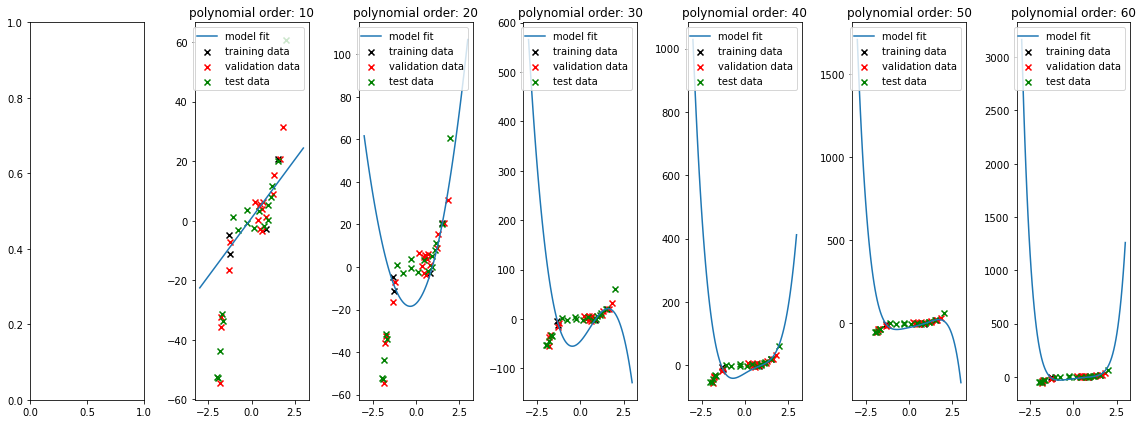

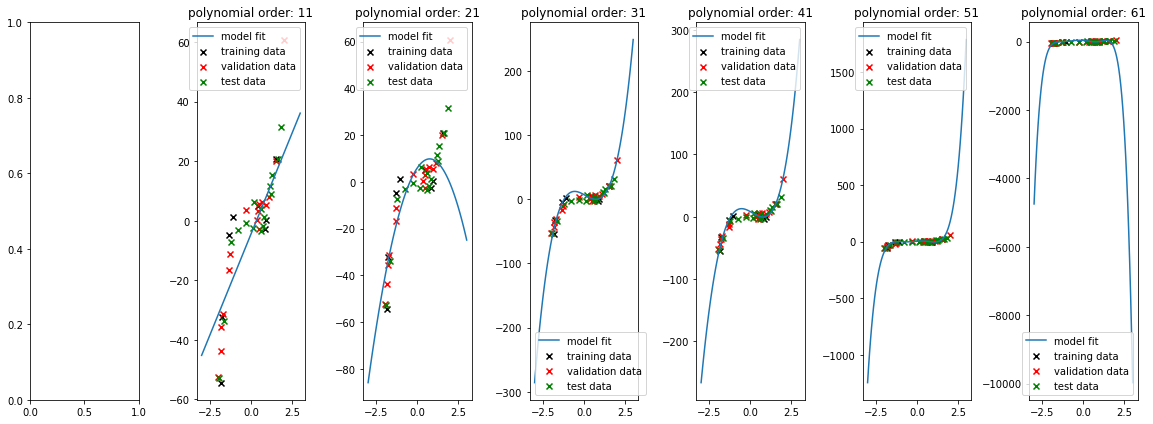

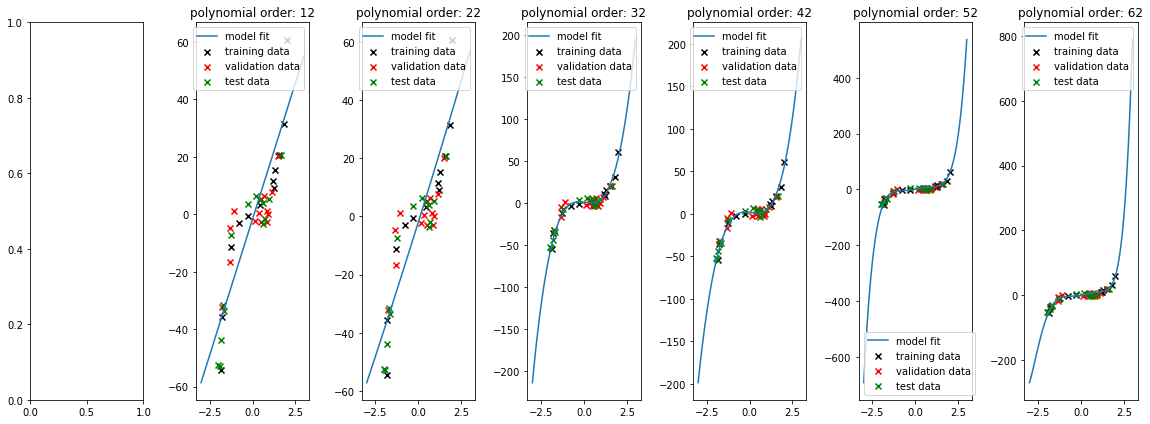

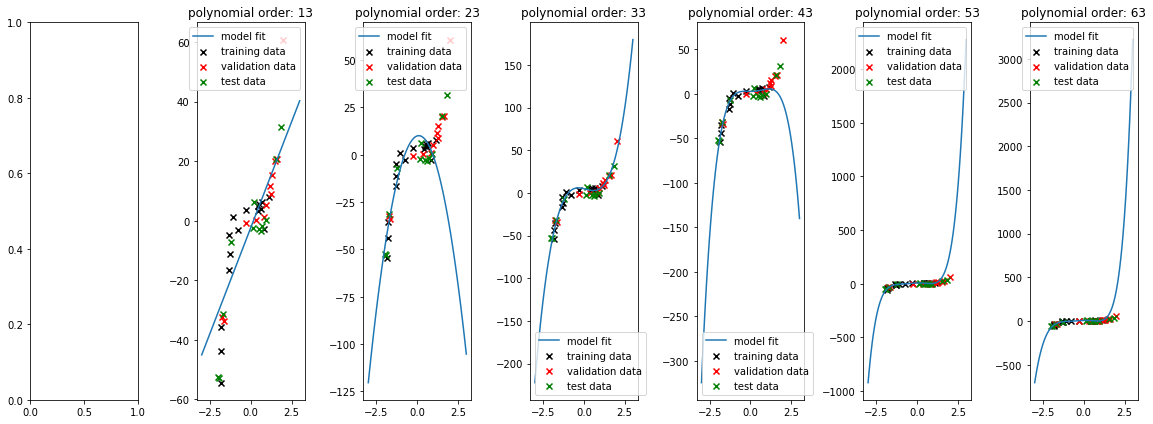

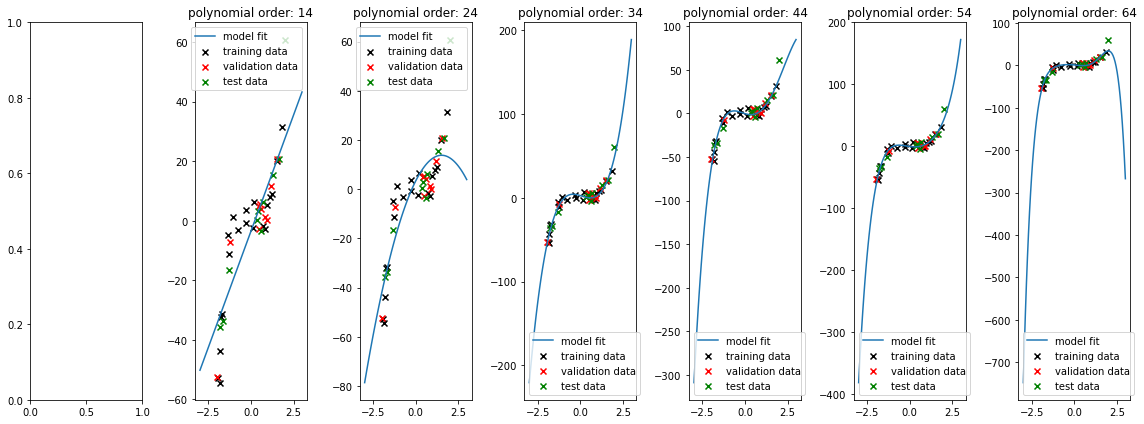

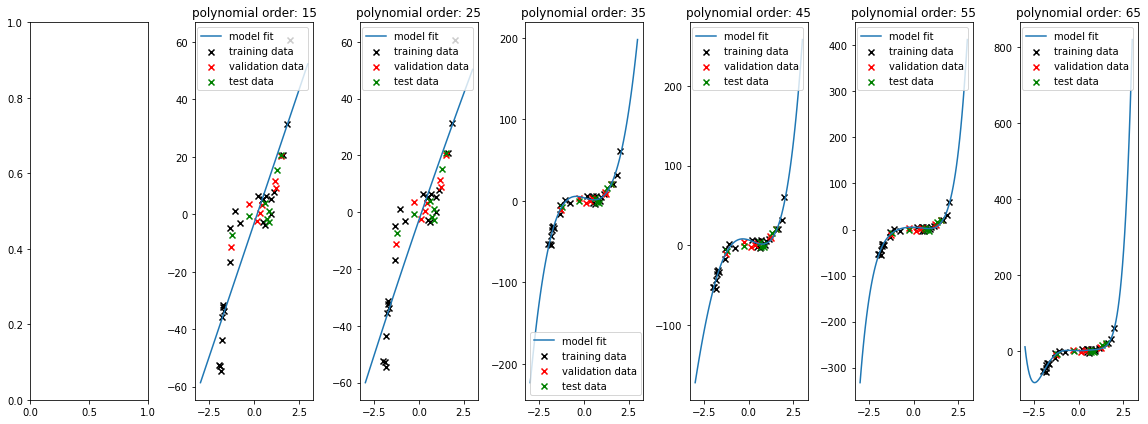

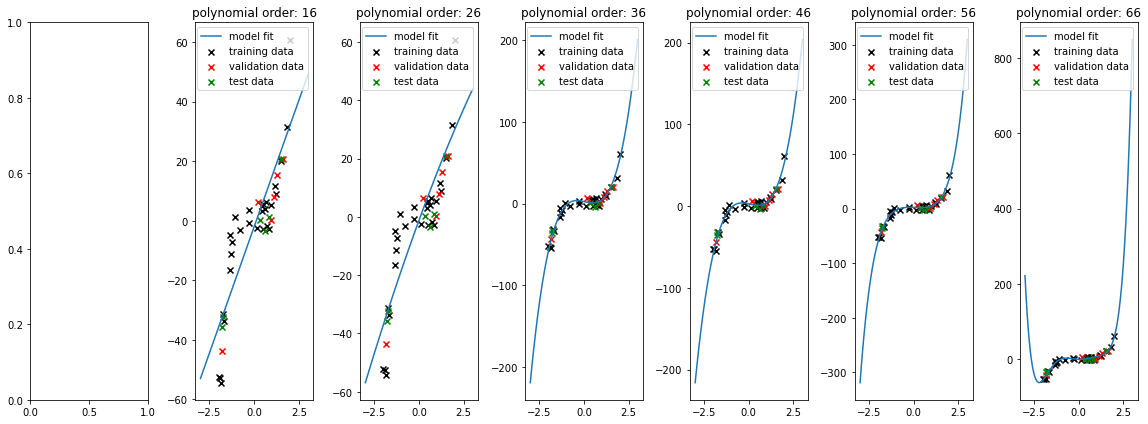

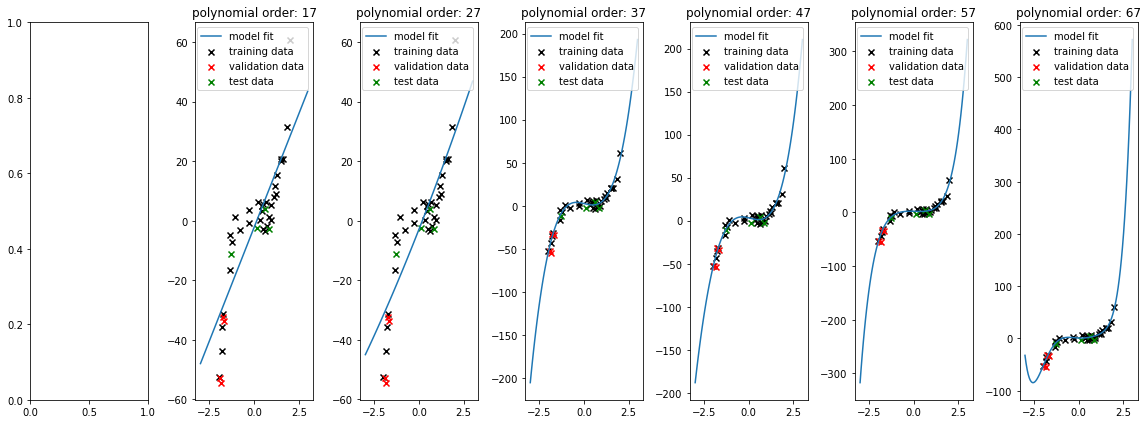

In [20]:
for split_number in range(0, 8):
    fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(16, 6))
    ax = axs.flatten()

    x_plot = np.linspace(-3, 3, 100)

    for i in range(1,7):
        print(my_matrix[i,split_number])
        
        ax[i].plot(x_plot, polynomial(x_plot, my_matrix[i,split_number]), label='model fit')
        ax[i].scatter(training_data[split_number]['X'], training_data[split_number]['Y'], marker='x', color='k', label='training data')
        ax[i].scatter(validation_data[split_number]['X'], validation_data[split_number]['Y'], marker='x', color='r', label='validation data')
        ax[i].scatter(test_data[split_number]['X'], test_data[split_number]['Y'], marker='x', color='g', label='test data')
        ax[i].set_title(f'polynomial order: ' + str(i) + str(split_number))
        ax[i].legend()

    plt.tight_layout()
    plt.legend()


### Task 1.3: Calculate the RMSE for Training and Validation Sets


Calculate the root mean squared error for both the training and validation sets. Plot this on a graph, and use this to decide which model is the best fit. Fill out the first question in the corrosponding questionaire. 

In [ ]:
from sklearn.metrics import mean_squared_error
training_RMSEs = []
validation_RMSEs = []
orders = range(1,7)

#######################
### TO DO ###

for order in range(1,7):
    y_train_pred = np.polyval(coefficients[order], training_data['X'])
    y_val_pred = np.polyval(coefficients[order], validation_data['X'])
    
    training_RMSEs.append(np.sqrt(mean_squared_error(training_data['Y'], y_train_pred)))
    validation_RMSEs.append(np.sqrt(mean_squared_error(validation_data['Y'], y_val_pred)))
    
   
    
    


    
#######################




best = np.argmin(validation_RMSEs)
print('best model:', orders[best])
print("Training RMSEs : " +str(training_RMSEs) )
print("Validation RMSEs : " +str(validation_RMSEs) )

In [ ]:
### TO DO ####
#Plot the training and validation RMSEs of the models
plt.plot(range(1,7), training_RMSEs, 'b', label='Training')
plt.plot(range(1,7), validation_RMSEs, 'r', label='Validation')



plt.xlabel('Polynomial order')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Part 2: Model Performance

### Task 2.1 Use the test set to evaluate model performance 

Calculate the RMSE of the model predictions compared to the test data 

In [ ]:
### TO DO: use the test dataset to calculate the RMSE of the best model on the test data
test_RMSEs = []
orders = range(1,7)

#######################
### TO DO ###

for order in range(1,7):
    y_test_pred = np.polyval(coefficients[order], test_data['X'])
    
    
    test_RMSEs.append(np.sqrt(mean_squared_error(test_data['Y'], y_test_pred)))
    
    
   
    
    


    
#######################




best = np.argmin(test_RMSEs)
print(best)
print('best model:', orders[best])
print("Test RMSEs : "+str(test_RMSEs)  )
####################


In [ ]:
plt.plot(range(1,7), training_RMSEs, 'g', label='Testing')

plt.xlabel('Polynomial order')
plt.ylabel('RMSE')
plt.legend()
plt.show()